## Imports and Connection

In [30]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [31]:
# Connect to database
conn = sqlite3.connect("../data/sales.db")

In [32]:
#db check
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables in DB: ", tables)

Tables in DB:      name
0  sales


## Preview the data

In [33]:
df = pd.read_sql("SELECT * FROM sales LIMIT 5;", conn)
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,...,quantity,discount,profit,order_year,order_month,order_month_name,profit_margin,discounted_price,shipping_days,unit_price
0,1,CA-2016-152156,2016-11-08 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,2,0.00,41.9136,2016,11,November,16.00,261.960000,3,130.9800
1,2,CA-2016-152156,2016-11-08 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,3,0.00,219.5820,2016,11,November,30.00,731.940000,3,243.9800
2,3,CA-2016-138688,2016-06-12 00:00:00,2016-06-16 00:00:00,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,2,0.00,6.8714,2016,6,June,47.00,14.620000,4,7.3100
3,4,US-2015-108966,2015-10-11 00:00:00,2015-10-18 00:00:00,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,5,0.45,-383.0310,2015,10,October,-40.00,526.667625,7,191.5155
4,5,US-2015-108966,2015-10-11 00:00:00,2015-10-18 00:00:00,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,2,0.20,2.5164,2015,10,October,11.25,17.894400,7,11.1840


## Total Sales by Month

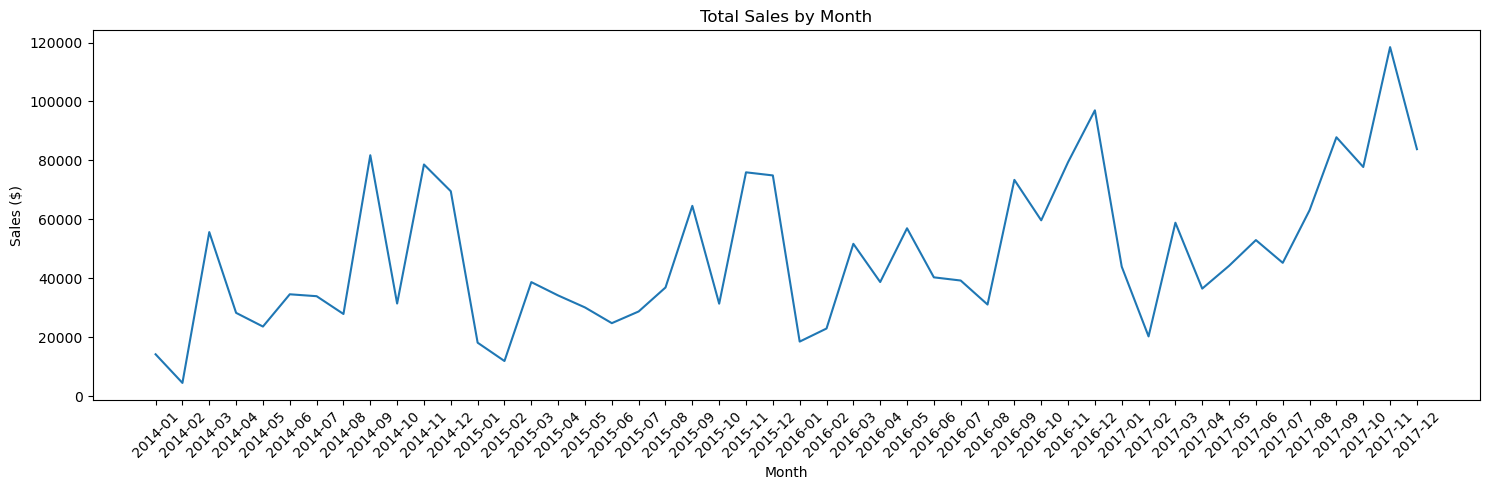

In [34]:
query = """
SELECT strftime('%Y-%m', order_date) AS year_month,
       SUM(sales) AS total_sales
FROM sales
GROUP BY year_month
ORDER BY year_month;
"""

sales_monthly = pd.read_sql(query, conn)

plt.figure(figsize=(15, 5))
plt.plot(sales_monthly['year_month'], sales_monthly['total_sales'])
plt.xticks(rotation=45)
plt.title("Total Sales by Month")
plt.xlabel("Month")
plt.ylabel("Sales ($)")
plt.tight_layout()
plt.show()

## Profit by Category

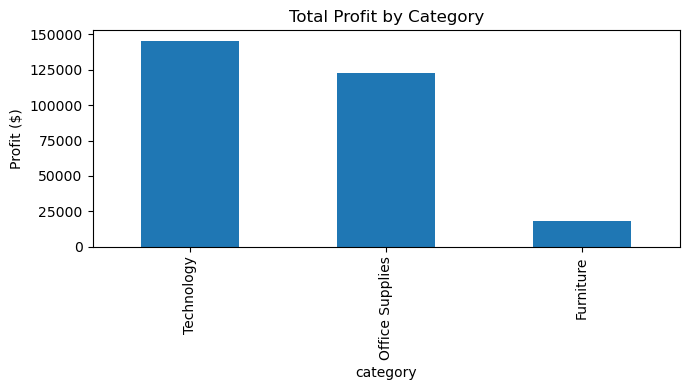

In [35]:
query = """
SELECT category, SUM(profit) AS total_profit
FROM sales
GROUP BY category
ORDER BY total_profit DESC;
"""
profit_cat = pd.read_sql(query, conn)

profit_cat.plot(kind='bar', x='category', y='total_profit', legend=False, figsize=(7,4))
plt.title("Total Profit by Category")
plt.ylabel("Profit ($)")
plt.tight_layout()
plt.show()

## Region and Segment Performance

In [36]:
query = """
SELECT region, segment, SUM(sales) AS total_sales, SUM(profit) AS total_profit
FROM sales
GROUP BY region, segment
ORDER BY total_sales DESC;
"""
region_seg = pd.read_sql(query, conn)
region_seg

,region,segment,total_sales,total_profit
0,West,Consumer,362880.7730,57450.6040
1,East,Consumer,350908.1670,41190.9843
2,Central,Consumer,252031.4340,8564.0481
3,West,Corporate,225855.2745,34437.4299
4,East,Corporate,200409.3470,23622.5789
5,South,Consumer,195580.9710,26913.5728
6,Central,Corporate,157995.8128,18703.9020
7,West,Home Office,136721.7770,16530.4150
8,East,Home Office,127463.7260,26709.2168
9,South,Corporate,121885.9325,15215.2232


## Close Connection

In [37]:
#conn.close()
#print("Connection closed.")

## Export Query Results to CSV

In [41]:
# Paths
BASE_DIR = Path.cwd()
DB_PATH = Path("../data/sales.db")
SQL_PATH = Path("../sql/queries.sql")
EXPORT_DIR = Path("../exports")

EXPORT_DIR.mkdir(exist_ok=True)

# Connect to database
conn = sqlite3.connect(DB_PATH)

with open(SQL_PATH, "r") as f:
    queries = f.read().split(";")

for i, query in enumerate(queries):
    query = query.strip()
    if not query:
        continue
    df = pd.read_sql_query(query, conn)
    output_path = EXPORT_DIR / f"query_{i+1}.csv"
    df.to_csv(output_path, index=False)
    print(f"Exported: {output_path.name} ({len(df)} rows)")

conn.close()
print("All queries exported successfully!")

Exported: query_1.csv (48 rows)
Exported: query_2.csv (3 rows)
Exported: query_3.csv (10 rows)
Exported: query_4.csv (12 rows)
Exported: query_5.csv (4 rows)
All queries exported successfully!
